# Problem Description 

This project is a data collection or data processing solution for gathering text data from images. The objective is to extract text from photographs taken with a mobile phone. More specifically, these images are medals from swimming competitons (see below). Each medal or pin has a stamp with the results of the swimmer, it contains relevant information about the event like: ranking, time, event number, swimmer's category, event type, swimmer's name, swimmer's age, swimmer's team, competition date, and competition name.

The motivation to build this solution is to generate this dataset with swimming results, to be analyzed and tell the story about this swimmer's performance (in this case me). This data also serves for a further project I have in mind about a data analytics project portfolio with some personal touch.

![Medals](img/medal_example.png)

In [1]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import os

# Exploratory Data Analysis

The photos are high definintion with approximately 3024 × 4032. Their size is around 16.8 MB. There are 4 types of images, the 3 different medals (gold, silver, and bronze) and the pin. These pins' tag usually have an irregular form since they are not strictly plain. This irregularities might present more difficulties for the model to extract the information.

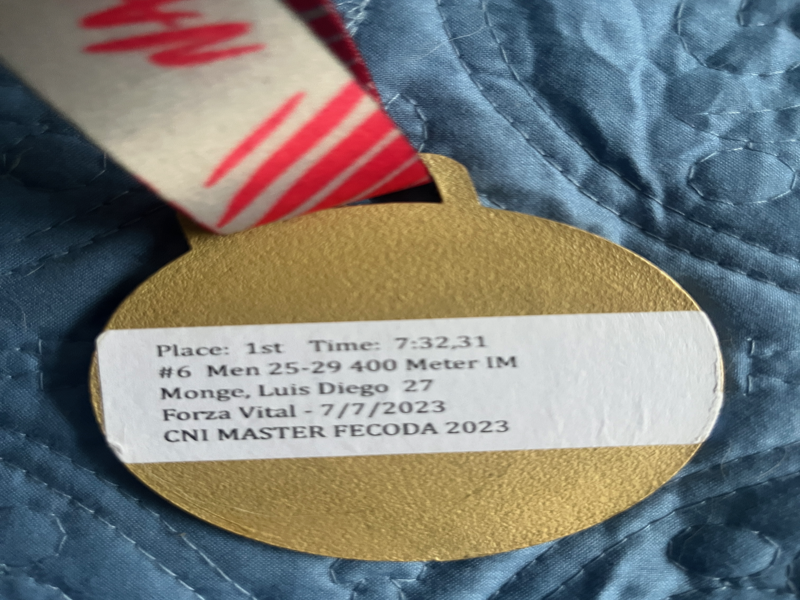

In [2]:
image = Image.open("medals_png/IMG_0425.png")
image = image.resize((800, 600))
image

Listing the image paths:

In [3]:
images_paths = list(map(lambda x: "medals_png/" + x, os.listdir('medals_png')))
images_paths[:5]

['medals_png/IMG_0438.png',
 'medals_png/IMG_0439.png',
 'medals_png/IMG_0429.png',
 'medals_png/IMG_0428.png',
 'medals_png/IMG_0449.png']

In [4]:
def display_multiple_img(images_paths, rows, cols):
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
        except:
            continue;
    plt.tight_layout()
    plt.show()

A broader view at the different pictures.

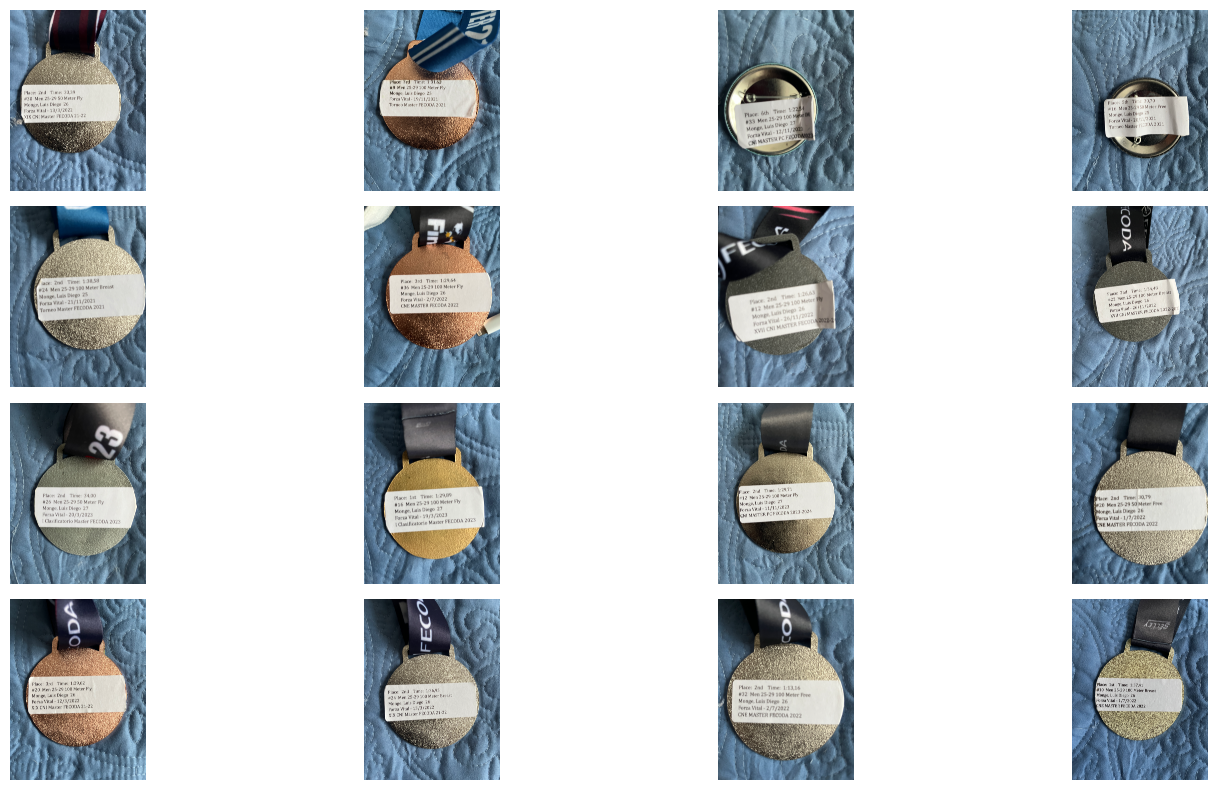

In [5]:
display_multiple_img(images_paths[:16],4,4)

In [6]:
def styling():
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        plt.xticks([])
        plt.yticks([])

def hist(image_path):
    plt.figure(figsize=(16, 3))
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    plt.subplot(1, 5, 1)
    plt.imshow(img)
    styling()
    
    custom_colors = ["#ef233c", "#76da71", "#2667ff","#aea3b0"]
    labels = ['Red Channel', 'Green Channel', 'Blue Channel','Total']
    
    for i in range(1,4):
        plt.subplot(1, 5, i+1)
        plt.hist(img[:, :, i-1].reshape(-1),bins=64,color=custom_colors[i-1],alpha = 0.6)
        plt.xlabel(labels[i-1],fontsize=10)
        styling()
        
    plt.subplot(1, 5, 5)
    plt.hist(img.reshape(-1),bins=128,color=custom_colors[3],alpha = 0.6)
    plt.xlabel(labels[3],fontsize=10)
    styling()
    plt.show()

Dive deeper into the different colors.

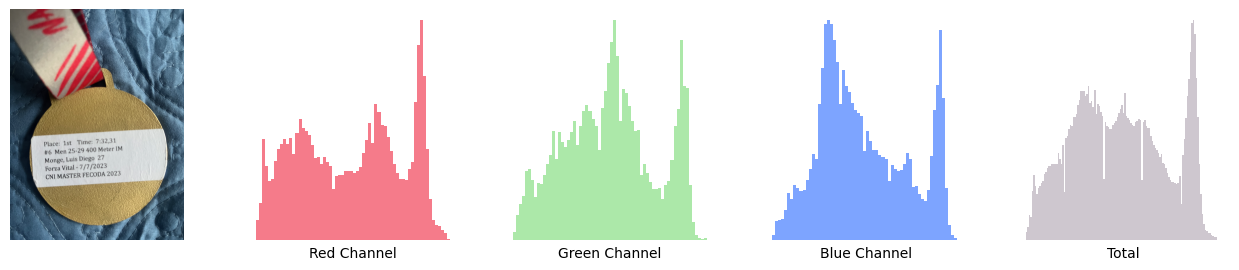

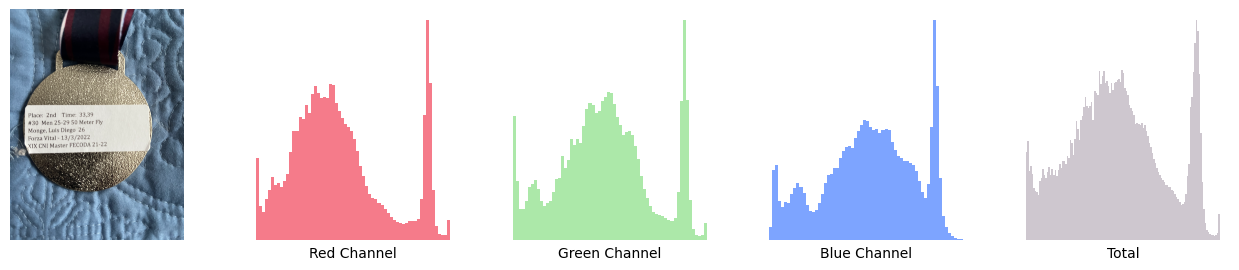

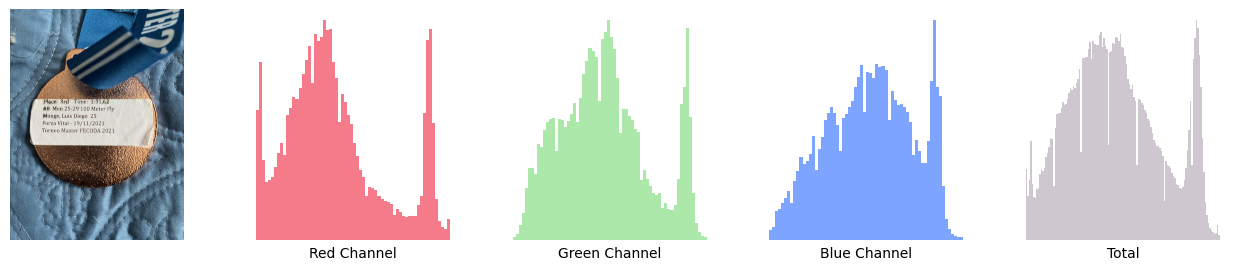

In [7]:
hist(images_paths[-11])
hist(images_paths[0])
hist(images_paths[1])

Note: This amazing color histograms and multiple display image functions were taken from Ruchi Bhatia's [kaggle notebook](https://www.kaggle.com/code/ruchi798/getting-started-with-gans).

# Analysis

Since this a unsupervised learning problem, to extract the text from the images, a pre-trained optical character recognition (OCR) engine is used. The Tesseract OCR is based on a Long-Short term memory neural network coded in C++.

Hewlett-Packard labs developed the Tesseract during the 1990s and finally made it open source in 2005, where Google continued working on it up until the year 2018. Tesseract supports various input image formats like PNG, JPEG and TIFF, and a list of output formats including plain text, HTML, PDF, and TSV. The engine offers support for over 100 languages.

In [8]:
def ocr(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    text = pytesseract.image_to_string(img)
    return text

In [9]:
image_text_ocr = {}
for image in images_paths:
    image_text_ocr[image] = ocr(image)

In [10]:
image_text_ocr

{'medals_png/IMG_0438.png': "Sf 5 ! pa} re 2\njeeatr j ; f -—\n£ 7 So ( . A ats\n. r gittel ty\n‘ Fs r . pada tl\nwe, le rf . ve aid\n2 “Se.\n. z\nPi ssiiey\n‘ Ay Mg\nub per\nA Ae Ail }\nrh\n\ni '\n\n,\n\nSag lg wn “-\n\nNT\n\nly\na\n\nva P #\n\nLa\n\nba |\nHt\n;\nPare. |\n\nc\ni\ni\n“_—\n;\nan\n\nZz\noe\n\n.\n\nODA\n\nQO Meter\n*.\n\na\n—-\nPs\n\nc\n-\n7\n\n' : Mty vy ae\n(rary 4 7 *} rt. 4\n\nge, Luis Diego\nNi Master |!\n\n*\n“\n\ni ¢ wet s if\nhe Tee 4\n+ eh bie - “ f\n\nUe im y é\n\norza Vital - 13/3/20\n\n#30 Men 25-29\nF\nXIX ¢\n\nMon\n\n",
 'medals_png/IMG_0439.png': 'ly\n\n021\n\n2]\nA2\n\n20\nOD:\n\nC\n\n.\n\nl€\n\nTime\n\nD\n\nis\nForza Vital - 19/11/\nforneo Master FE\n\na\n3rd\n\nae a”\nrt\n\n4 ide\n\n- vale\nAMAL he\na Fite: % he Sd\n\nPlace\n\ns\n\nY\n\nVv\n—_\n<\n©\n-)\n—\non\non\n™N\nWw\nNN\n\n=\n\nY\n©\nBeat\n\nMonge, Lu\n\nLa\n\n',
 'medals_png/IMG_0429.png': 'eS,\n\ncba,\n',
 'medals_png/IMG_0428.png': '10,70\n\nMeter Free\n\n2021\nDA 2021\n\nagi:\nFees.\n\nBe\n\n',

The first attempt didn't resulted as expected. The engine captured a couple of words but the ouput is mostly gibberish. The next aproach will be to convert the images into black and white and see how the model performs.

In [39]:
def ocr_bw(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.medianBlur(img, 3)
    text = pytesseract.image_to_string(img)
    return text

In [40]:
image_text_ocr_bw = {}
for image in images_paths:
    image_text_ocr_bw[image] = ocr_bw(image)

After trying a thresh binary transformation and not getting any readable outputs, the best perfoming transformation is the gray coloring applying hte medianBlur function that reduces noise.

In [41]:
image_text_ocr_bw

{'medals_png/IMG_0438.png': '5\n\nLuis Diego\n\n")\nrs\n\n—\n-—_\n~\n—\n-\n—\n—\n\n.\n\n#\n\nt)\n\n;\noo\n\n.\n\n>\n5©,\n\nMong\n\nza Vital\n\nFor\n\ndl as\n* an\nhe\n\n4\n\nod lt a\n\nPe sed ee CA\n4 Pie Au”\n\n: (a\nCw ahit\noA SA gee\n\ne w\n4 te OG As\n\n} ~@.*\nes a\n- i "4\njp _\n\nere\n§\n\nfo te nat\n',
 'medals_png/IMG_0439.png': 'Place: Time: 1:31,62\n#8 Men 25-29 100 Meter Fly\nMonge, Luis Diego 25\n\nForza Vital - 19/11/2021\n\nTorneo Master FECODA 2021\n\n',
 'medals_png/IMG_0429.png': '',
 'medals_png/IMG_0428.png': 'ree\n\n.\n=\n\n(Jeter |\nO21\n\nIDA 2021\n\n}\n\n\\\n\nge, Luis D:\nital - 2!\nneo Maste:\n\n7a V\n\nOl\nOl\n\n|\n\n>)\n—-\nMN\n|\nv\n=\n=\n\nMon\n\n',
 'medals_png/IMG_0449.png': '021\n\n¥\n=\n\nved ¥\n\n\\ aN \\\n\nTA ah attua\nWw v4 Pe | LT eee) eee » bate\n\nf\nof\nri \\\n\n‘ 7 \\\n\nLA\n\n¢\n§\n.\n\n¢\n\n: 23 FC\nTorneo Mastet PEL\n\n',
 'medals_png/IMG_0448.png': '1:29,64\n\n36 Men 25-29 100 Meter |\n\nTime\n\nard\n\nPlace:\nFs\n\nly\n\n¥\noJ\n\n.\n.\n\

# Results

Even the best example found in the outputs is not good enough. In the best case, the structure of the text can be read but it contains incomplete or misleading information. This makes the output very difficult to trust.

In [46]:
print(image_text_ocr['medals_png/IMG_0433.png'])

Place: 40
8 Men 25-29 100 Meter Pre

Monge, Luis Diego 27

4 Vital - 11/11/2023
°N] MASTER PC FECODA 2023-407

korz




# Discussion and Conclusion


The Tesseract OCR model without further training is not good enough for extracting the information from the medals' photos. The model can be improved and trained with a larger dataset, this aproach was not attempted because the dataset to be classified is very small and further work in training the model is not worth it, since a person can simply manually label the data. The main objective was to automate the data inputation task but investing the resources to generate a training set and collecting more data for the model to be useful and trust worthy does not payoff.

There were some improvements by appying data transformations to the images and one could tweak the parameters to obtain a better response. The issue is the current responses are very far off from the true response and the mix of numbers and text can really be confusing specially when you are trying to extract specific data like a timelapse and a date.

Circling around the goal of extracting the swimmers data, it's a better option to find a website with swimming records and web scrape their data.